In [45]:
import pickle
import os
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import netCDF4 as nc

# Read pkls
# Pulling data from cleaned pickle files
# These files are the cleaned data from the original files
temp_file = r'C:\Users\bm233557\Downloads\ALL_5Min_TEMPS.pkl'
temp_df = pd.read_pickle(temp_file)
wind_file = r'C:\Users\bm233557\Downloads\ALL_5Min_WIND.pkl'
wind_df = pd.read_pickle(wind_file)
tke_file = r'C:\Users\bm233557\Downloads\ALL_5Min_TKE.pkl'
tke_df = pd.read_pickle(tke_file)

In [46]:
# Read in the netCDF file
file_path = r"D:\Savant\Data\ERA_5\ERA5Reanalysis.nc"
era_5 = nc.Dataset(file_path, 'r')

In [47]:
era_5

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2025-04-22T17:12 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.39.0 with {"source": "tmpcvbsxza8/data.grib", "filter_by_keys": {"stream": ["oper"], "stepType": ["instant"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): valid_time(2184), latitude(1), longitude(1)
    variables(dimensions): int64 number(), int64 valid_time(valid_time), float64 latitude(latitude), float64 longitude(longitude), <class 'str'> expver(valid_time), float32 v10(valid_time, latitude, longitude), float32 v10n(valid_time, latitude, longitude)
    groups: 

In [48]:
era_5.dimensions.keys()

dict_keys(['valid_time', 'latitude', 'longitude'])

In [49]:
era_5.variables.keys()

dict_keys(['number', 'valid_time', 'latitude', 'longitude', 'expver', 'v10', 'v10n'])

In [96]:
times_var = era_5.variables['valid_time']
time_in_numbers = times_var[:]
time_units = times_var.units
time_in_datetime = nc.num2date(time_in_numbers, time_units)
time = np.array([
    dt.datetime(t.year, t.month, t.day, t.hour, t.minute, t.second)
    for t in time_in_datetime.data
])

time

array([datetime.datetime(2018, 9, 1, 0, 0),
       datetime.datetime(2018, 9, 1, 1, 0),
       datetime.datetime(2018, 9, 1, 2, 0), ...,
       datetime.datetime(2018, 11, 30, 21, 0),
       datetime.datetime(2018, 11, 30, 22, 0),
       datetime.datetime(2018, 11, 30, 23, 0)],
      shape=(2184,), dtype=object)

In [60]:
expver_var = era_5.variables['expver']
expver = expver_var[:]

v10_var = era_5.variables['v10']
v10 = v10_var[:]
v10_units = v10_var.units
v10n_var = era_5.variables['v10n']
v10n = v10n_var[:]
v10n_units = v10n_var.units

v10_at_location = v10_var[:, 0, 0]

In [99]:
v10_var

<class 'netCDF4.Variable'>
float32 v10(valid_time, latitude, longitude)
    _FillValue: nan
    GRIB_paramId: 166
    GRIB_dataType: an
    GRIB_numberOfPoints: 1
    GRIB_typeOfLevel: surface
    GRIB_stepUnits: 1
    GRIB_stepType: instant
    GRIB_gridType: regular_ll
    GRIB_uvRelativeToGrid: 0
    GRIB_NV: 0
    GRIB_Nx: 1
    GRIB_Ny: 1
    GRIB_cfName: unknown
    GRIB_cfVarName: v10
    GRIB_gridDefinitionDescription: Latitude/Longitude Grid
    GRIB_iDirectionIncrementInDegrees: 0.25
    GRIB_iScansNegatively: 0
    GRIB_jDirectionIncrementInDegrees: 0.25
    GRIB_jPointsAreConsecutive: 0
    GRIB_jScansPositively: 0
    GRIB_latitudeOfFirstGridPointInDegrees: 40.1
    GRIB_latitudeOfLastGridPointInDegrees: 40.1
    GRIB_longitudeOfFirstGridPointInDegrees: -88.4
    GRIB_longitudeOfLastGridPointInDegrees: -88.4
    GRIB_missingValue: 3.4028234663852886e+38
    GRIB_name: 10 metre V wind component
    GRIB_shortName: 10v
    GRIB_totalNumber: 0
    GRIB_units: m s**-1
    long

In [86]:
time_in_datetime.data[:]

array([cftime.DatetimeGregorian(2018, 9, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2018, 9, 1, 1, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2018, 9, 1, 2, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2018, 11, 30, 21, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2018, 11, 30, 22, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2018, 11, 30, 23, 0, 0, 0, has_year_zero=False)],
      shape=(2184,), dtype=object)

In [97]:
y = v10_at_location.data
x = time

In [92]:
x

array([cftime.DatetimeGregorian(2018, 9, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2018, 9, 1, 1, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2018, 9, 1, 2, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2018, 11, 30, 21, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2018, 11, 30, 22, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2018, 11, 30, 23, 0, 0, 0, has_year_zero=False)],
      shape=(2184,), dtype=object)

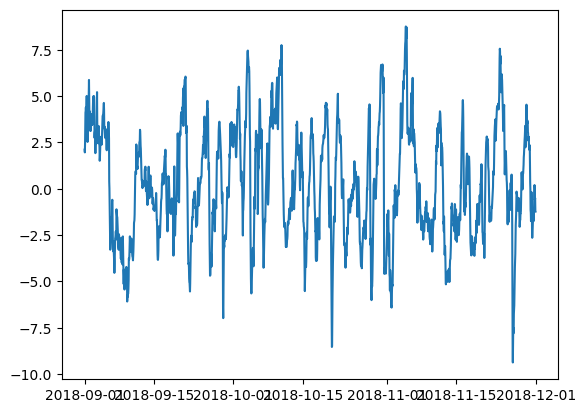

In [98]:
plt.plot(x, y)

In [100]:
# Read in the netCDF file
file_path1 = r"C:\Users\bm233557\Downloads\594012b09d4aa22d8c93ea4cad80df26\data_stream-oper_stepType-instant.nc"
file_path2 = r"C:\Users\bm233557\Downloads\594012b09d4aa22d8c93ea4cad80df26\data_stream-oper_stepType-max.nc"
instant_file = nc.Dataset(file_path1, 'r')
max_file = nc.Dataset(file_path2, 'r')

In [102]:
instant_file.variables.keys()

dict_keys(['number', 'valid_time', 'latitude', 'longitude', 'expver', 'u10', 'v10', 'u100', 'v100', 'u10n', 'v10n', 'i10fg'])

In [103]:
times_var = instant_file.variables['valid_time']
time_in_numbers = times_var[:]
time_units = times_var.units
time_in_datetime = nc.num2date(time_in_numbers, time_units)
time = np.array([
    dt.datetime(t.year, t.month, t.day, t.hour, t.minute, t.second)
    for t in time_in_datetime.data
])

time

array([datetime.datetime(2018, 9, 1, 0, 0),
       datetime.datetime(2018, 9, 1, 1, 0),
       datetime.datetime(2018, 9, 1, 2, 0), ...,
       datetime.datetime(2018, 11, 30, 21, 0),
       datetime.datetime(2018, 11, 30, 22, 0),
       datetime.datetime(2018, 11, 30, 23, 0)],
      shape=(2184,), dtype=object)

In [106]:
v10_var = instant_file.variables['v10']
v10 = v10_var[:]
v10_units = v10_var.units
u10_var = instant_file.variables['u10']
u10 = v10_var[:]
u10_units = u10_var.units

v10_at_location = v10_var[:, 0, 0]
u10_at_location = u10_var[:, 0, 0]

In [113]:
v = v10_at_location.data
u = u10_at_location.data
x = time

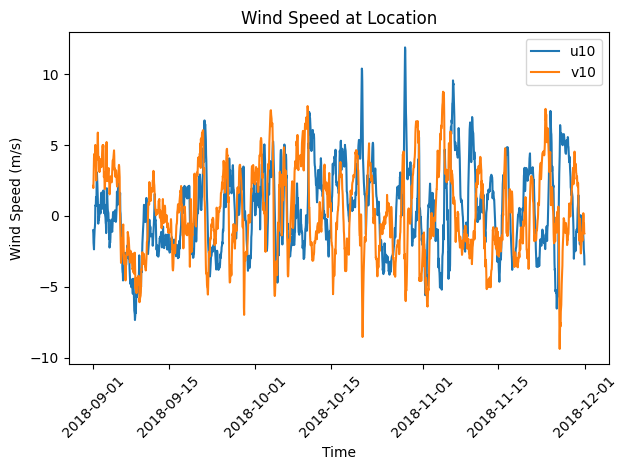

In [118]:
plt.plot(x, u)
plt.plot(x, v)
plt.legend(['u10', 'v10'])
plt.title('Wind Speed at Location')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()